In [1]:
# Pacotes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Análise de Risco de Crédito


### Objetivo: Prever possíveis clientes inadimplentes.

Fonte dos dados: https://www.kaggle.com/kabure/german-credit-data-with-risk

Variável target: "Risk" 

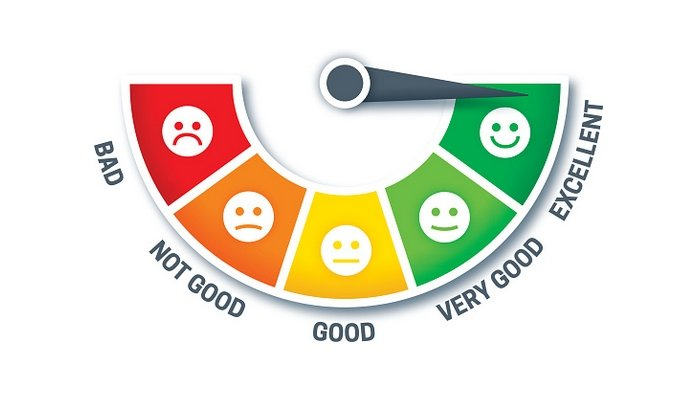

In [2]:
from IPython.display import Image
Image("credit.jpg")

In [3]:
# Importando os dados.
df = pd.read_csv("german_credit_data.csv", sep = ",")

In [4]:
# Visualizando as primeiras linhas.
display(df.head(50))

# Shape dos dados.
df.shape

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


(1000, 10)

In [5]:
#df["Risk"] = df["Risk"].replace({"good": 0, "bad": 1})
#df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})
#df["Housing"] = df["Housing"].replace({"own": 0, "free": 1, "rent": 2})
#df["Saving accounts"] = df["Saving accounts"].replace({"little": 0, "quite rich": 1, "rich": 2, "moderate": 3})
#df["Checking account"] = df["Checking account"].replace({"little": 0, "moderate": 1, "rich": 2})
#df["Purpose"] = df["Purpose"].replace({"radio/TV": 0, "education": 1, "furniture/equipment": 2, "car": 3, "business": 4, 
                                       #"domestic appliances": 5, "repairs": 6, "vacation/others": 7})
#df["Risk"] = df["Risk"].astype("category")

In [6]:
# Descrições das variáveis.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
# Estatística das variáveis numéricas.
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Análise Exploratória

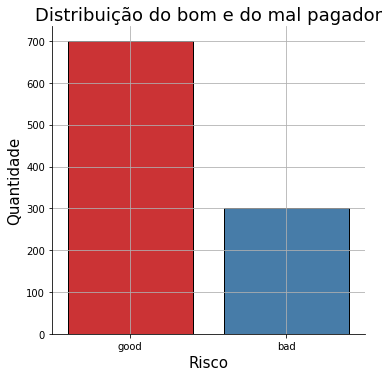

In [8]:
# plot.
sns.catplot(x = "Risk", kind = "count", palette = "Set1", edgecolor='black', data = df)
plt.title("Distribuição do bom e do mal pagador", fontsize = 18)
plt.xlabel("Risco", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)
plt.rc("grid", linestyle = "-", color = "black")
plt.grid()
plt.show()

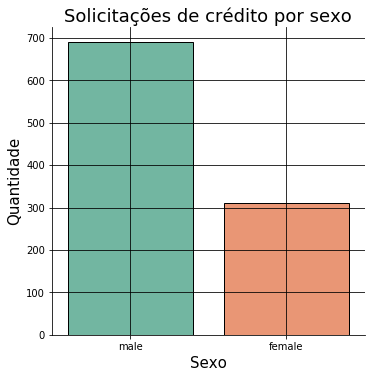

In [9]:
# plot
sns.catplot(x = "Sex", kind = "count", palette="Set2", edgecolor='black', data = df)
plt.title("Solicitações de crédito por sexo", fontsize = 18)
plt.xlabel("Sexo", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)
plt.rc("grid", linestyle = "-", color = "black")
plt.grid()
plt.show()

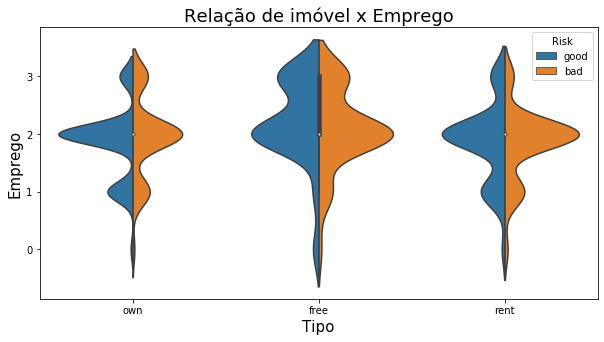

In [10]:
plt.figure(figsize = (10,5))
sns.violinplot(x = "Housing", y = "Job", hue = "Risk", data = df, split = True)
plt.title("Relação de imóvel x Emprego", fontsize = 18)
plt.xlabel("Tipo", fontsize = 15)
plt.ylabel("Emprego", fontsize = 15)
plt.show()

In [11]:
# Separando as solicitações de crédito por categoria.
radio_tv = np.sum(df["Credit amount"].loc[df["Purpose"] == "radio/TV"].values)
education = np.sum(df["Credit amount"].loc[df["Purpose"] == "education"].values)
furniture_equipment = np.sum(df["Credit amount"].loc[df["Purpose"] == "furniture/equipment"].values)
car = np.sum(df["Credit amount"].loc[df["Purpose"] == "car"].values)
business = np.sum(df["Credit amount"].loc[df["Purpose"] == "business"].values)
repairs = np.sum(df["Credit amount"].loc[df["Purpose"] == "repairs"].values)
vacation_others = np.sum(df["Credit amount"].loc[df["Purpose"] == "vacation/others"].values)
domestic_app = np.sum(df["Credit amount"].loc[df["Purpose"] == "domestic appliances"].values)

In [12]:
# Instanciando o valor de cada categoria.
credit = [696543, 169873, 555125, 1269881, 403330, 60018, 98512, 17976]
purpose = ["radio_tv", "education", "furniture_equipment","car", "business", "repairs", "vacation_others", "domestic_app"]

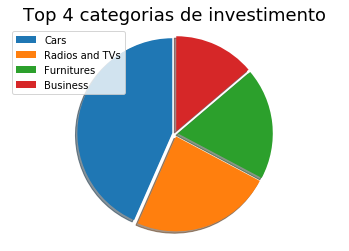

Cars: 1269881
Radios and TVs: 696543
Furnitures: 555125
Business: 403330


In [13]:
# Plot.
values = [1269881, 696543, 555125, 403330]
purpose = ["Cars", "Radios and TVs", "Furnitures", "Business"]

# Definindo o espaçamento.
explode = (0.03, 0.03, 0.03, 0.03)

# Configurações.
plt.pie(values, shadow = True, explode = explode, startangle = 90)
plt.legend(purpose, loc = 2)
plt.title("Top 4 categorias de investimento", fontsize = 18)

# Proporção do gráfico.
plt.axis("equal")
plt.show()

print("Cars:", car)
print("Radios and TVs:", radio_tv)
print("Furnitures:", furniture_equipment)
print("Business:", business)

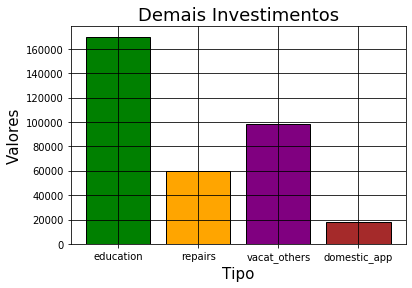

In [14]:
# Plot.
values = [169873, 60018, 98512, 17976]
purpose = ["education", "repairs", "vacat_others", "domestic_app"]

# Configurações.
plt.bar(purpose, values, color = ["green", "orange", "purple", "brown"], edgecolor = "black")
plt.title("Demais Investimentos", fontsize = 18)
plt.xlabel("Tipo", fontsize = 15)
plt.ylabel("Valores", fontsize = 15)
plt.grid()
plt.show()

In [15]:
# Substituindo os valores da variável AGE.
df["Sex"] = df["Sex"].replace({"male": 0, "female": 1})

In [16]:
# Alterando a variável AGE para categórica.
df["Sex"] = df["Sex"].astype("category")

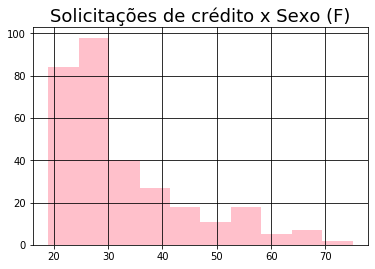

In [17]:
# Plot
df[(df.Age >= 18) & (df.Age <= 75) & (df.Sex == 1)].Age.hist(bins = 10, color = "pink");
plt.title("Solicitações de crédito x Sexo (F)", fontsize = 18)
plt.show()

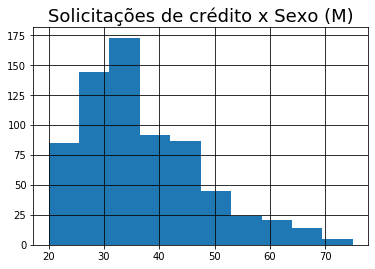

In [18]:
# Plot
df[(df.Age >= 18) & (df.Age <= 75) & (df.Sex == 0)].Age.hist(bins = 10);
plt.title("Solicitações de crédito x Sexo (M)", fontsize = 18)
plt.show()

In [19]:
# Substituindo os valores da variável CHECKING ACCOUNT.
df["Checking account"] = df["Checking account"].replace({"little": 0, "moderate": 1, "rich": 2})

In [20]:
# Instanciando as médias das idades pelo tipo de conta.
meanLittle = np.mean(df["Age"].loc[df["Checking account"] == 0])
meanModerate = np.mean(df["Age"].loc[df["Checking account"] == 1]) 
meanRich = np.mean(df["Age"].loc[df["Checking account"] == 2])

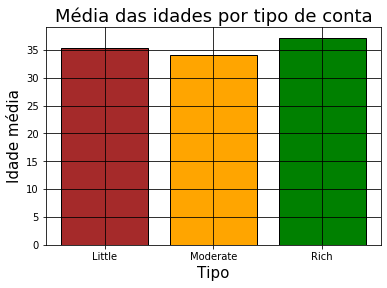

Little: 35.0
Moderate: 34.0
Rich: 37.0


In [21]:
# Plot.
values = [meanLittle, meanModerate, meanRich]
types = ["Little", "Moderate", "Rich"]

# Configurações.
plt.bar(types, values, color = ["brown", "orange", "green"], edgecolor = "black")
plt.title("Média das idades por tipo de conta", fontsize = 18)
plt.xlabel("Tipo", fontsize = 15)
plt.ylabel("Idade média", fontsize = 15)
plt.grid()
plt.show()

print("Little:", round(meanLittle, 0))
print("Moderate:", round(meanModerate, 0))
print("Rich:", round(meanRich, 0))

In [22]:
# Substituindo os valores da variável TARGET.
df["Risk"] = df["Risk"].replace({"good": 0, "bad": 1})

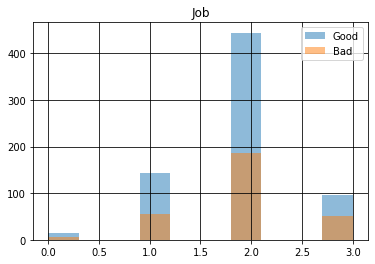

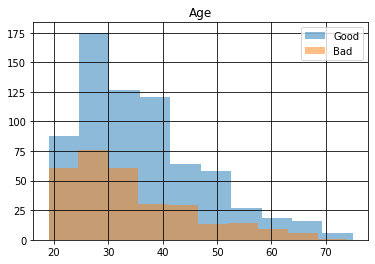

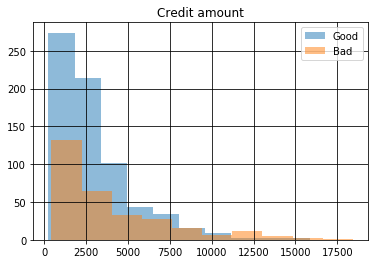

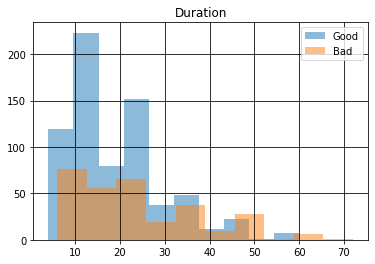

In [23]:
# Selecionando as colunas específicas para o plot.
cols = df[["Job", "Age", "Credit amount", "Duration"]]

# Plot.
good = df.loc[df["Risk"] == 0]
bad = df.loc[df["Risk"] == 1]
for i in cols:
    good[i].hist(alpha = 0.5, label = "good")
    bad[i].hist(alpha = 0.5, label = "bad")
    plt.title(i)
    plt.rc("grid", linestyle = "-", color = "black")
    plt.legend(["Good", "Bad"])
    plt.show()

## Tratando os dados faltantes

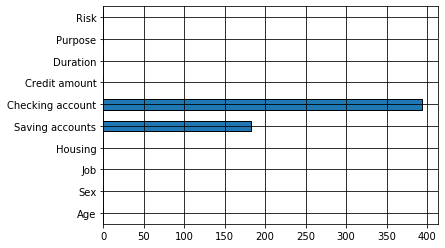

In [24]:
# Verificando valores missing no dataset.
df.isnull().sum().plot.barh(edgecolor='black')
plt.grid()
plt.show()

In [25]:
# Substituindo os valores da variável SAVING ACCOUNTS.
df["Saving accounts"] = df["Saving accounts"].replace({"little": 0, "quite rich": 1, "rich": 2, "moderate": 3})

In [26]:
# Substituindo os valores NaN pela moda, na qual é 0.
df["Saving accounts"].fillna(0, inplace = True)
df["Checking account"].fillna(0, inplace = True)

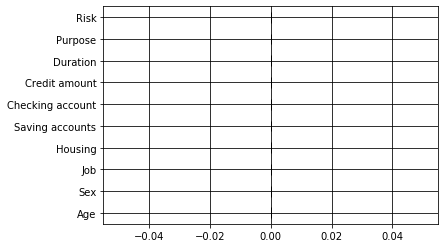

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,own,0.0,0.0,1169,6,radio/TV,0
1,22,1,2,own,0.0,1.0,5951,48,radio/TV,1
2,49,0,1,own,0.0,0.0,2096,12,education,0
3,45,0,2,free,0.0,0.0,7882,42,furniture/equipment,0
4,53,0,2,free,0.0,0.0,4870,24,car,1


In [27]:
# Verificando novamente os valores missing.
df.isnull().sum().plot.barh(edgecolor='black')
plt.grid()
plt.show()

display(df.head())

## Transformando as demais variáveis

In [28]:
# Alterando o formato das variáveis.
df["Housing"] = df["Housing"].replace({"own": 0, "free": 1, "rent": 2})
df["Purpose"] = df["Purpose"].replace({"radio/TV": 0, "education": 1, "furniture/equipment": 2, "car": 3, "business": 4, 
                                       "domestic appliances": 5, "repairs": 6, "vacation/others": 7})

# Alterando para o tipo categórica.
df["Job"] = df["Job"].astype("category")
df["Housing"] = df["Housing"].astype("category")
df["Saving accounts"] = df["Saving accounts"].astype("category")
df["Checking account"] = df["Checking account"].astype("category")
df["Purpose"] = df["Purpose"].astype("category")
df["Risk"] = df["Risk"].astype("category")

In [29]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,0,0.0,0.0,1169,6,0,0
1,22,1,2,0,0.0,1.0,5951,48,0,1
2,49,0,1,0,0.0,0.0,2096,12,1,0
3,45,0,2,1,0.0,0.0,7882,42,2,0
4,53,0,2,1,0.0,0.0,4870,24,3,1


In [30]:
# Confirmando as alterações.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null category
Job                 1000 non-null category
Housing             1000 non-null category
Saving accounts     1000 non-null category
Checking account    1000 non-null category
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null category
Risk                1000 non-null category
dtypes: category(7), int64(3)
memory usage: 79.2 KB


## Correlações

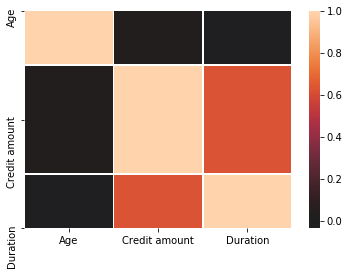

In [31]:
# Plot.
sns.heatmap(df.corr(), linewidths=.5, center = 0)
plt.show()

# Separando os dados em treino e teste

In [32]:
# Selecionando TODAS as colunas, menos a variável TARGET.
X = df.drop("Risk", axis = 1)

# Obtendo a variável TARGET.
Y = df["Risk"]

# Padronização dos dados

In [33]:
# Pacote.
from sklearn.preprocessing import StandardScaler

In [34]:
# Aplicando a padronização.
scaler = StandardScaler().fit(X)
dfPad = scaler.transform(X)

In [35]:
# Sumarizando os dados transformados.
print("Dados Originais: \n\n", X.values)
print("\nDados Padronizados: \n\n", dfPad[0:5,:])

Dados Originais: 

 [[67 0 2 ... 1169 6 0]
 [22 1 2 ... 5951 48 0]
 [49 0 1 ... 2096 12 1]
 ...
 [38 0 2 ... 804 12 0]
 [23 0 2 ... 1845 45 0]
 [27 0 2 ... 4576 45 3]]

Dados Padronizados: 

 [[ 2.76645648 -0.67028006  0.14694918 -0.59820135 -0.47691186 -0.65383104
  -0.74513141 -1.23647786 -1.28640193]
 [-1.19140394  1.49191369  0.14694918 -0.59820135 -0.47691186  1.00143742
   0.94981679  2.24819436 -1.28640193]
 [ 1.18331231 -0.67028006 -1.38377145 -0.59820135 -0.47691186 -0.65383104
  -0.41656241 -0.73866754 -0.67266055]
 [ 0.8315025  -0.67028006  0.14694918  0.68549253 -0.47691186 -0.65383104
   1.63424694  1.75038404 -0.05891917]
 [ 1.53512213 -0.67028006  0.14694918  0.68549253 -0.47691186 -0.65383104
   0.5666635   0.25695309  0.55482221]]


# Dividindo os dados em treino e teste

In [36]:
# Divisão dos dados, 30% treino e 70% teste.
size = 0.30

In [37]:
# Separando os conjuntos.
X_train, X_test, Y_train, Y_test = train_test_split(dfPad, Y, test_size = size, random_state = 0)

# Modelo v1 - Regressão Logística

In [38]:
# Pacotes.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
# Treinando o modelo.
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Previsões e gerando a confusion matrix.
y_pred = model1.predict(X_test)
matrix = confusion_matrix(Y_test, y_pred)

In [41]:
# Visualizando a confusion matrix.
print("Confusion Matrix:\n", matrix)
print()

# Avaliando o modelo com os dados de treino.
ac = accuracy_score(Y_test, y_pred)
print("Acurácia:\n %.1f%%" % (ac * 100))

Confusion Matrix:
 [[201  13]
 [ 75  11]]

Acurácia:
 70.7%


# Seleção do Modelo Preditivo

#### Modelo v2 - Linear Discriminant Analysis
#### Modelo v3 - Naive Bayes
#### Modelo v4 - KNN
#### Modelo v5 - Decision Trees
#### Modelo v6 - SVM

In [42]:
# Pacotes.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [43]:
# Definindo os valores de folds
num_folds = 10

In [44]:
# Instanciando os algoritmos.
models = []
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [45]:
# Loop para avaliação de cada modelo.
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, dfPad, Y, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f" % (name, cv_results.mean())
    print(msg)

Linear Discriminant Analysis: 0.70
Naive Bayes: 0.69
KNN: 0.67
Decision Tree: 0.61
SVM: 0.70


# Otimização do Modelo - Ajuste de Hyperparâmetros

In [46]:
# Pacote.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [47]:
# Definindo os valores que serão testados.
valores_grid = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [48]:
# Criando o modelo.
model3 = LogisticRegression()

In [49]:
# Criando o grid.
grid = GridSearchCV(estimator = model3, param_grid = valores_grid)
grid.fit(dfPad, Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
# Print do resultado.
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 70.700
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# XGBoost

In [51]:
from xgboost import XGBClassifier

In [52]:
# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dfPad, Y, test_size = 0.30, random_state = 0)

In [53]:
# Criando o modelo.
modelo = XGBClassifier()

In [54]:
# Treinando o modelo.
modelo.fit(X_treino, y_treino)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [55]:
# Fazendo previsões.
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

In [56]:
# Avaliando as previsões.
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 70.33%


# Random Forest

In [57]:
# Pacotes.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [58]:
# Definindo os valores para o número de folds.
num_folds = 10

In [59]:
# Definindo o número de trees.
num_trees = 500
max_features = 5

In [60]:
# Separando os dados em folds.
kfold = KFold(num_folds, True, random_state = 0)

In [61]:
# Criando o modelo.
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

In [62]:
# Cross Validation.
resultado = cross_val_score(modelo, dfPad, Y, cv = kfold)

In [63]:
# Print do resultado.
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.300


# Gradient Boosting

In [64]:
# Pacote.
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
# Definindo os valores para o número de folds.
num_folds = 10

In [66]:
# Definindo o número de trees.
num_trees = 100

In [67]:
# Separando os dados em folds.
kfold = KFold(num_folds, True, random_state = 0)

In [68]:
# Criando o modelo.
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = 0)

In [69]:
# Cross Validation.
resultado = cross_val_score(modelo, dfPad, Y, cv = kfold)

In [70]:
# Print do resultado.
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 69.400


# Voting Ensemble

In [71]:
# Pacote.
from sklearn.ensemble import VotingClassifier

In [72]:
# Definindo os folds.
num_folds = 15

In [73]:
# Separando os dados em folds.
kfold = KFold(num_folds, True, random_state = 0)

In [74]:
# Criando os modelos.
estimators = []

modelo1 = LogisticRegression(max_iter = 500)
estimators.append(('logistic', modelo1))

modelo2 = DecisionTreeClassifier()
estimators.append(('cart', modelo2))

modelo3 = SVC()
estimators.append(('svm', modelo3))

In [75]:
# Criando o modelo ensemble.
ensemble = VotingClassifier(estimators)

In [76]:
# Cross Validation.
resultado = cross_val_score(ensemble, X, Y, cv = kfold)

In [77]:
# Resultado.
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.995


# Balanceamento dos dados

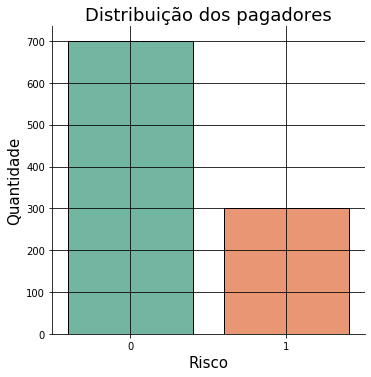

In [78]:
# Verificando a distribuição dos pagadores
sns.catplot(x = "Risk", kind = "count", palette = "Set2", edgecolor='black', data = df)
plt.title("Distribuição dos pagadores", fontsize = 18)
plt.xlabel("Risco", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)
plt.rc("grid", linestyle = "-", color = "black")
plt.grid()
plt.show()


É nítido o desequilibrio dos dados, usaremos um método para equilibrar a variável "Risk", dessa forma os dados não ficarão tendenciosos, e o modelo aprenderá de uma forma igual.

In [79]:
# Importando o pacote para balancear os dados.
from imblearn.over_sampling import RandomOverSampler

In [80]:
# Separando os dados.
dfValues = dfPad
dfTarget = Y

In [81]:
# Criando a função.
rus = RandomOverSampler(random_state = 0)

In [82]:
# Aplicando o balanceamento.
X_resampled, y_resampled = rus.fit_resample(dfPad, Y)

In [83]:
# Shape dos dados balanceados).
display(X_resampled.shape)
y_resampled.shape

(1400, 9)

(1400,)

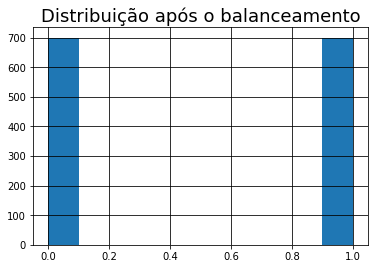

In [84]:
# Nova distribuição.
y_resampled.hist()
plt.title("Distribuição após o balanceamento", fontsize = 18)
plt.show()

## Agora com os dados balanceados, o modelo preditivo aprenderá de forma igual, vamos observar se teremos melhores resultados.

# Modelo v1 - Regressão Logística

In [85]:
# Pacotes.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [86]:
# Divisão.
size = 0.30

# Separando os conjuntos.
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = size, random_state = 0)

In [87]:
# Treinando o modelo.
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Previsões e gerando a confusion matrix.
y_pred = model1.predict(X_test)
matrix = confusion_matrix(Y_test, y_pred)

# Visualizando a confusion matrix.
print("Confusion Matrix:\n", matrix)
print()

Confusion Matrix:
 [[131  74]
 [ 93 122]]



In [89]:
# Avaliando o modelo com os dados de treino.
ac = accuracy_score(Y_test, y_pred)
print("Acurácia:\n %.1f%%" % (ac * 100))

Acurácia:
 60.2%


# Seleção do Modelo Preditivo

#### Modelo v1 - Linear Discriminant Analysis
#### Modelo v2 - Naive Bayes
#### Modelo v3 - KNN
#### Modelo v4 - Decision Trees
#### Modelo v5 - SVM

In [90]:
# Definindo os valores de folds.
num_folds = 10

# Instanciando os algoritmos.
models = []
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Loop para avaliação de cada modelo.
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f" % (name, cv_results.mean())
    print(msg)

Linear Discriminant Analysis: 0.59
Naive Bayes: 0.59
KNN: 0.65
Decision Tree: 0.81
SVM: 0.62


Após o balanceamento, a Árvore de decisões teve um resultado considerável.

# Random Forest

In [91]:
# Features.
max_features = 8

# Definindo o número de trees.
num_trees = 150

In [92]:
# Instanciando o modelo.
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features, max_depth = 6)

In [93]:
resultado = modelo.fit(X_train, Y_train)

In [94]:
scores = resultado.score(X_train, Y_train)

In [102]:
print("Acurácia: %.2f%%" % (scores * 100.0))

Acurácia: 85.82%


# XGBoost

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [101]:
teste_size = 0.30

# Criando o dataset de treino e de teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size = teste_size, random_state = 0)

# Criando o modelo.
modelo = XGBClassifier()

# Treinando o modelo.
modelo.fit(X_treino, y_treino)

# Pront do modelo.
print(modelo)

# Fazendo previsões.
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [99]:
# Avaliando as previsões.
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 80.48%


# Conclusão

Após toda a parte de exploração e pré-processamento. Foram gerados alguns modelos com os dados **desbalanceados**, ou seja, os dados continham mais informações de bons do que mals pagadores. O balanceamento incial, foi feito utilizando o **SMOTE**, porem os modelos a seguir, tiveram desempenhos não muito bons. Então foi feito a troca para o **RandomOverSampler**, na qual os modelos tiveram resultados bem melhores.

Ao final, o melhor resultado até então foi o algoritmo **RandomForestClassifier**, com a acurácia de **85%**.


